## 1.Using keras library to load model and cifar10

In [1]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.models import load_model
import os
import numpy as np
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline

import random

Using TensorFlow backend.


In [2]:
'''
LOAD CIFAR10
'''
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)
print(type(x_test))
print(type(y_test[0]))

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples
(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


## 2.use array to store cifar10 label

In [3]:

cifar10_labels = np.array([
    'airplane',
    'automobile',
    'bird',
    'cat',
    'deer',
    'dog',
    'frog',
    'horse',
    'ship',
    'truck'])

## 3.Load and predict

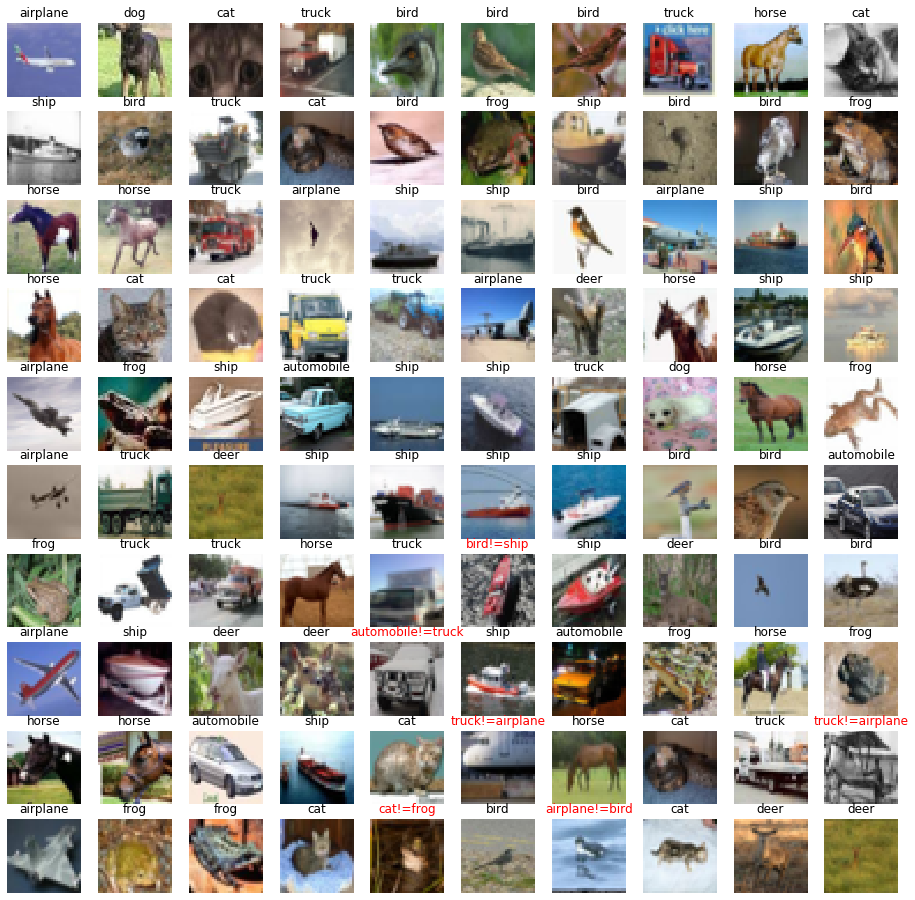

The number of correct answers: 94
The number of mistake: 6
A correct answer rate: 94.0 %


In [4]:
'''
LOAD MODEL AND PREDICT
'''

# use ResNet
model = load_model('ResNet-for-CIFAR-10-with-Keras.h5')

# use CNN
# model = load_model('keras_cifar10_trained_model.h5')

    
def convertCIFER10Data(image):
    img = image.astype('float32')
    img /= 255
    c = np.zeros(32*32*3).reshape((1,32,32,3))
    c[0] = img
    return c

plt.figure(figsize=(16,16))

right = 0
mistake = 0

for i in range(100):
    index = random.randint(0, x_test.shape[0])
    image = x_test[index]
    data = convertCIFER10Data(image)

    plt.subplot(10, 10, i+1)
    plt.imshow(image)
    plt.axis('off')

    ret = model.predict(data, batch_size=1) 
    #print(ret)

    bestnum = 0.0
    bestclass = 0
    for n in [0,1,2,3,4,5,6,7,8,9]:
        if bestnum < ret[0][n]:
            bestnum = ret[0][n]
            bestclass = n

    if y_test[index] == bestclass:
        plt.title(cifar10_labels[bestclass])
        right += 1
    else:
        plt.title(cifar10_labels[bestclass] + "!=" + cifar10_labels[y_test[index][0]], color='#ff0000')
        mistake += 1
                                                                   
plt.show()
print("The number of correct answers:", right)
print("The number of mistake:", mistake)
print("A correct answer rate:", right/(mistake + right)*100, '%')